In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

### Prepare data and define classification functions

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def train_rf(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['entropy', 'log_loss', 'gini']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = RandomForestClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred, digits=4))

    # explainer = shap.TreeExplainer(rfc)
    # shap_values = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values, X_test, class_names=rfc.classes_)
    # print(rfc.classes_[0])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 0], X_test)
    # print(rfc.classes_[1])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 1], X_test)
    # print(rfc.classes_[2])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 2], X_test)

    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                        index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    fig, ax = plt.subplots()
    feature_importances[:20].plot.bar(ax=ax)
    ax.set_title("Feature Importances of Random Forest Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print(feature_importances[:5])
    return y_test, rfc_pred

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

def train_gradient_boosted(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['squared_error', 'friedman_mse']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = GradientBoostingClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = GradientBoostingClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred, digits=4))

    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                        index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    fig, ax = plt.subplots()
    feature_importances[:20].plot.bar(ax=ax)
    ax.set_title("Feature Importances of Random Forest Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print(feature_importances[:5])

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def train_knn(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [5, 10, 20, 50]
    criterion = ['uniform', 'distance']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = KNeighborsClassifier(n_neighbors=n_est, weights=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test.values)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = KNeighborsClassifier(n_neighbors=best_params_est, weights=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test.values)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred, digits=4))

In [27]:
data = pd.read_csv('../../0_data/1_intermediate_ML/selected_features_one_hot_complexity_32_categorical_demanding_oneformer_crash.csv')
data.columns

Index(['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count', 'image_id', 'weather_cloudy',
       'weather_foggy', 'weather_rainy', 'weather_snowy',
       'traffic_condition_light', 'traffic_condition_moderate',
       'road_condition_icy', 'road_condition_wet', 'visibility_low visibility',
       'time_of_day_dusk/dawn', 'time_of_day_night',
       'road_layout_slight curve', 'road_layout_straight', 'road_type_highway',
       'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', 'demanding_level', 'speed',
       'speed_std', 'speed_mean', 'lon_acceleration_mean',
       'lon_acceleration_std

In [28]:
features = {
    'oneformer': ['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count'],
    'semantic': ['weather_cloudy',
       'weather_foggy', 'weather_rainy', 'weather_snowy',
       'traffic_condition_light', 'traffic_condition_moderate',
       'road_condition_icy', 'road_condition_wet', 'visibility_low visibility',
       'time_of_day_dusk/dawn', 'time_of_day_night',
       'road_layout_slight curve', 'road_layout_straight', 'road_type_highway',
       'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide'],
    'complexity': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'],
    'index': ['demanding_level'],
    'driving': ['speed', 'speed_std', 'speed_mean',
       'lon_acceleration_mean', 'lon_acceleration_std', 'lon_acceleration_max',
       'lon_acceleration_min', 'speed_deviation',
       'speed_deviation_normalized']
}

In [29]:
del data['image_id']

### Complexity

n_estimators: 200
Criteria: gini
[[691 148 114]
 [193 639  67]
 [274 182 239]]
              precision    recall  f1-score   support

        High     0.5967    0.7251    0.6547       953
         Low     0.6594    0.7108    0.6842       899
      Medium     0.5690    0.3439    0.4287       695

    accuracy                         0.6160      2547
   macro avg     0.6084    0.5933    0.5892      2547
weighted avg     0.6113    0.6160    0.6034      2547

    importance
18    0.061054
31    0.059428
28    0.058378
3     0.057011
19    0.054575


(4305       Low
 937       High
 8925    Medium
 1893      High
 6404       Low
          ...  
 9979       Low
 8522      High
 8307    Medium
 4181       Low
 8539       Low
 Name: crash_likelihood, Length: 2547, dtype: category
 Categories (3, object): ['Low' < 'Medium' < 'High'],
 array(['Low', 'High', 'Low', ..., 'Low', 'Low', 'Medium'], dtype=object))

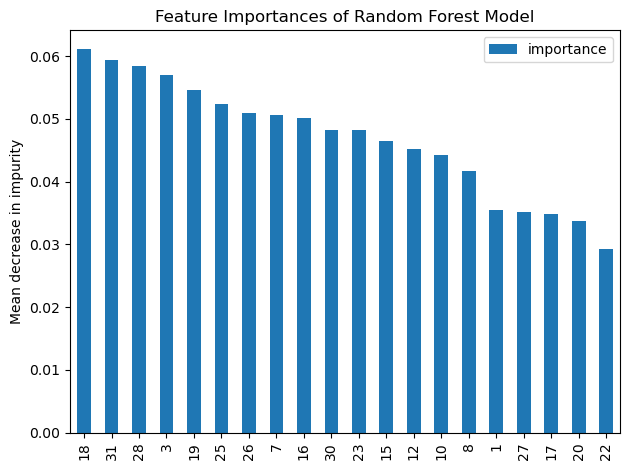

In [30]:
train_rf(data[features['complexity'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[653 171 129]
 [217 619  63]
 [340 200 155]]
              precision    recall  f1-score   support

        High     0.5397    0.6852    0.6038       953
         Low     0.6253    0.6885    0.6554       899
      Medium     0.4467    0.2230    0.2975       695

    accuracy                         0.5603      2547
   macro avg     0.5372    0.5323    0.5189      2547
weighted avg     0.5445    0.5603    0.5384      2547

    importance
18    0.261994
27    0.068917
28    0.048037
16    0.046959
31    0.044798


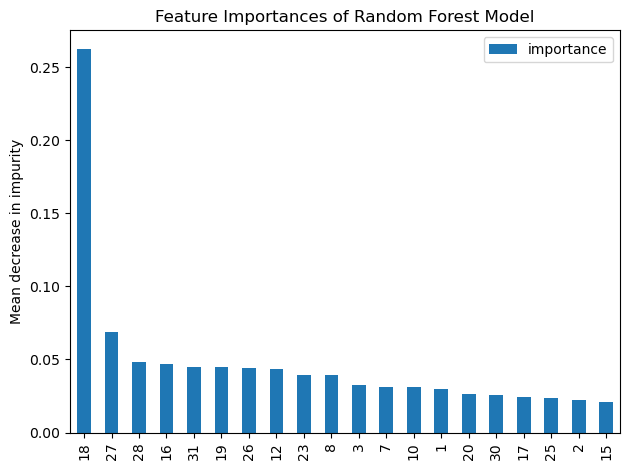

In [31]:
train_gradient_boosted(data[features['complexity'] + ['crash_likelihood']])

In [32]:
train_knn(data[features['complexity'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[588 168 197]
 [164 610 125]
 [214 181 300]]
              precision    recall  f1-score   support

        High     0.6087    0.6170    0.6128       953
         Low     0.6361    0.6785    0.6566       899
      Medium     0.4823    0.4317    0.4556       695

    accuracy                         0.5881      2547
   macro avg     0.5757    0.5757    0.5750      2547
weighted avg     0.5839    0.5881    0.5854      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + complexity

n_estimators: 200
Criteria: gini
[[777  88  88]
 [ 76 765  58]
 [182 143 370]]
              precision    recall  f1-score   support

        High     0.7507    0.8153    0.7817       953
         Low     0.7681    0.8509    0.8074       899
      Medium     0.7171    0.5324    0.6111       695

    accuracy                         0.7507      2547
   macro avg     0.7453    0.7329    0.7334      2547
weighted avg     0.7477    0.7507    0.7442      2547

                     importance
lead_car_vegetation    0.086652
vegetation             0.085811
lead_car_sky           0.048289
sky                    0.047490
18                     0.037920


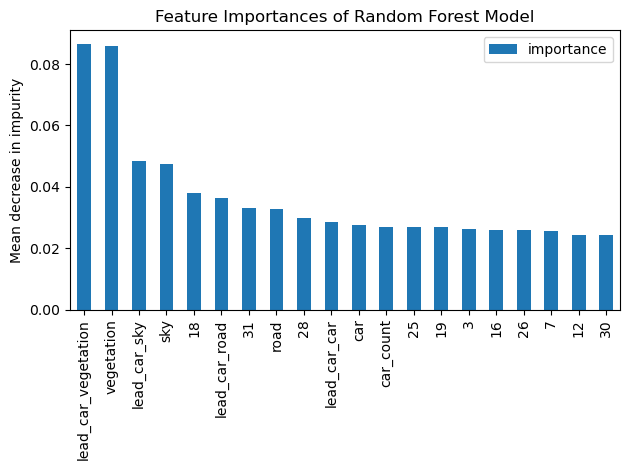

In [33]:
y_test, y_pred = train_rf(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])
y_test.to_csv('y_test_complexity_oneformer.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_complexity_oneformer_16_continuous.csv')

n_estimators: 200
Criteria: squared_error
[[696 106 151]
 [ 76 728  95]
 [224 173 298]]
              precision    recall  f1-score   support

        High     0.6988    0.7303    0.7142       953
         Low     0.7229    0.8098    0.7639       899
      Medium     0.5478    0.4288    0.4810       695

    accuracy                         0.6761      2547
   macro avg     0.6565    0.6563    0.6530      2547
weighted avg     0.6661    0.6761    0.6681      2547

                     importance
lead_car_vegetation    0.288443
vegetation             0.164028
31                     0.039820
car_count              0.039634
18                     0.036703


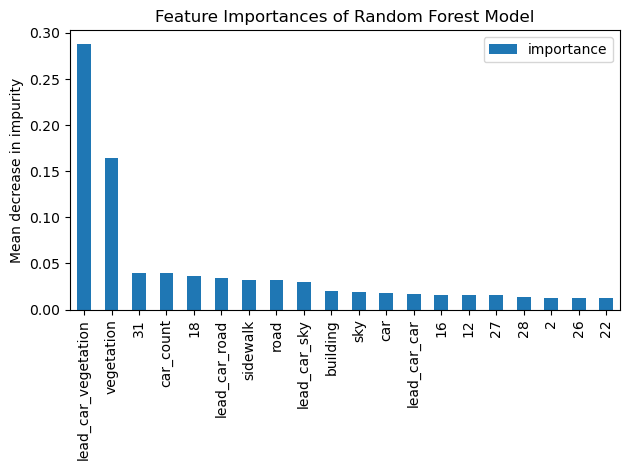

In [34]:
train_gradient_boosted(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])

In [35]:
train_knn(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[658 124 171]
 [ 82 720  97]
 [185 170 340]]
              precision    recall  f1-score   support

        High     0.7114    0.6905    0.7007       953
         Low     0.7101    0.8009    0.7527       899
      Medium     0.5592    0.4892    0.5219       695

    accuracy                         0.6745      2547
   macro avg     0.6602    0.6602    0.6585      2547
weighted avg     0.6694    0.6745    0.6703      2547



### Oneformer + driving + complexity

n_estimators: 200
Criteria: gini
[[832  58  63]
 [ 35 817  47]
 [136  79 480]]
              precision    recall  f1-score   support

        High     0.8295    0.8730    0.8507       953
         Low     0.8564    0.9088    0.8818       899
      Medium     0.8136    0.6906    0.7471       695

    accuracy                         0.8359      2547
   macro avg     0.8332    0.8242    0.8265      2547
weighted avg     0.8346    0.8359    0.8334      2547

                     importance
lead_car_vegetation    0.080825
vegetation             0.070708
lead_car_sky           0.039961
sky                    0.038743
speed_mean             0.036506


(4305       Low
 937       High
 8925    Medium
 1893      High
 6404       Low
          ...  
 9979       Low
 8522      High
 8307    Medium
 4181       Low
 8539       Low
 Name: crash_likelihood, Length: 2547, dtype: category
 Categories (3, object): ['Low' < 'Medium' < 'High'],
 array(['Low', 'High', 'Medium', ..., 'Medium', 'Low', 'Low'], dtype=object))

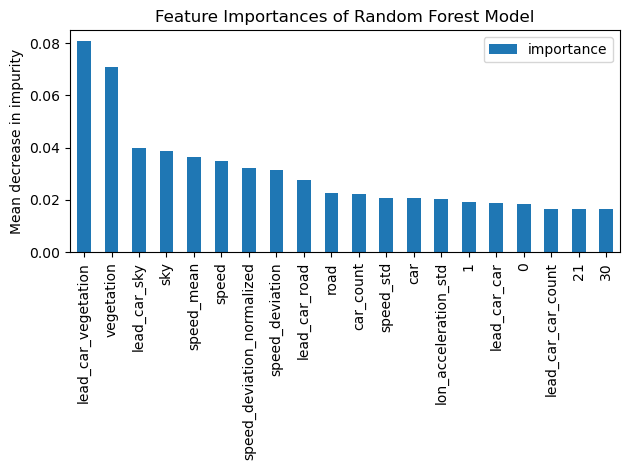

In [24]:
train_rf(data[features['oneformer'] + features['complexity'] + features['driving'] + ['crash_likelihood']])

n_estimators: 200
Criteria: friedman_mse
[[753  82 118]
 [ 51 735 113]
 [194 137 364]]
              precision    recall  f1-score   support

        High     0.7545    0.7901    0.7719       953
         Low     0.7704    0.8176    0.7933       899
      Medium     0.6118    0.5237    0.5643       695

    accuracy                         0.7271      2547
   macro avg     0.7122    0.7105    0.7099      2547
weighted avg     0.7212    0.7271    0.7228      2547

                     importance
lead_car_vegetation    0.246811
vegetation             0.132631
speed_deviation        0.051348
speed                  0.043583
speed_mean             0.042844


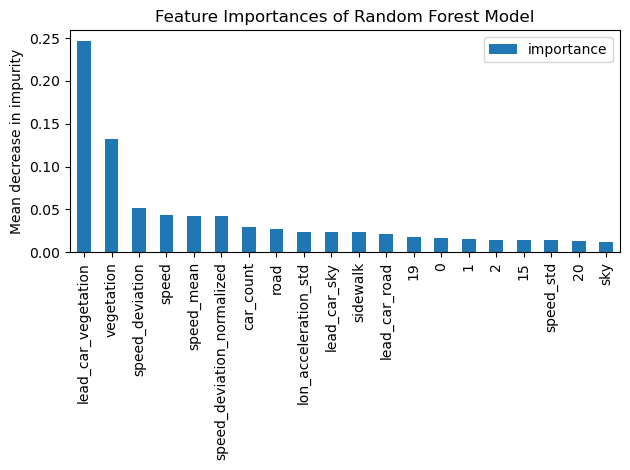

In [25]:
train_gradient_boosted(data[features['oneformer'] + features['complexity'] + features['driving'] + ['crash_likelihood']])

In [26]:
train_knn(data[features['oneformer'] + features['complexity'] + features['driving'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[725  97 131]
 [ 50 762  87]
 [128 119 448]]
              precision    recall  f1-score   support

        High     0.8029    0.7608    0.7812       953
         Low     0.7791    0.8476    0.8119       899
      Medium     0.6727    0.6446    0.6583       695

    accuracy                         0.7597      2547
   macro avg     0.7516    0.7510    0.7505      2547
weighted avg     0.7590    0.7597    0.7585      2547



### All features

n_estimators: 200
Criteria: entropy
[[869  41  43]
 [ 24 841  34]
 [102  45 548]]
              precision    recall  f1-score   support

        High     0.8734    0.9119    0.8922       953
         Low     0.9072    0.9355    0.9211       899
      Medium     0.8768    0.7885    0.8303       695

    accuracy                         0.8865      2547
   macro avg     0.8858    0.8786    0.8812      2547
weighted avg     0.8863    0.8865    0.8855      2547

                     importance
lead_car_vegetation    0.073602
vegetation             0.063387
sky                    0.038337
speed_mean             0.035152
lead_car_sky           0.034138


NameError: name 'y_test' is not defined

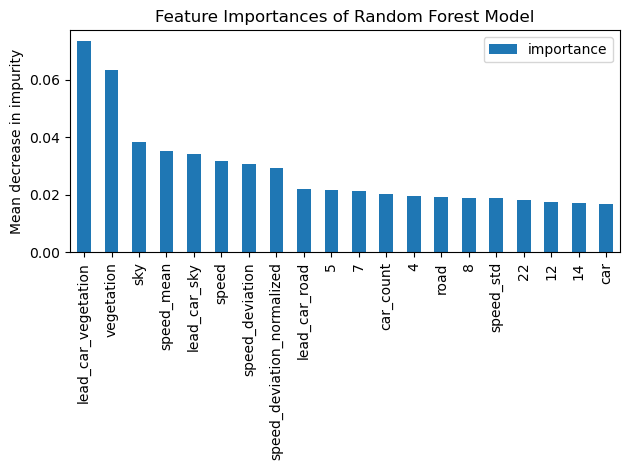

In [15]:
train_rf(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])
y_test.to_csv('y_test_oneformer_driving_semantic_complexity_oneformer.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_oneformer_driving_semantic_complexity_oneformer_32_categorical.csv')

n_estimators: 200
Criteria: squared_error
[[780  53 120]
 [ 43 770  86]
 [168  80 447]]
              precision    recall  f1-score   support

        High     0.7871    0.8185    0.8025       953
         Low     0.8527    0.8565    0.8546       899
      Medium     0.6845    0.6432    0.6632       695

    accuracy                         0.7841      2547
   macro avg     0.7748    0.7727    0.7734      2547
weighted avg     0.7823    0.7841    0.7829      2547

                     importance
lead_car_vegetation    0.226072
vegetation             0.118304
speed_deviation        0.045939
speed                  0.040809
speed_mean             0.038709


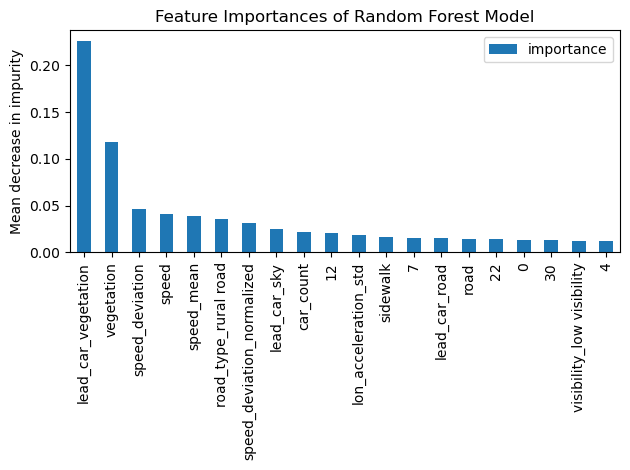

In [16]:
train_gradient_boosted(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

In [17]:
train_knn(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[802  51 100]
 [ 33 809  57]
 [103  55 537]]
              precision    recall  f1-score   support

        High     0.8550    0.8416    0.8482       953
         Low     0.8842    0.8999    0.8920       899
      Medium     0.7738    0.7727    0.7732       695

    accuracy                         0.8433      2547
   macro avg     0.8376    0.8380    0.8378      2547
weighted avg     0.8431    0.8433    0.8432      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
